# Music Genre Classification

## Model Training

We do model training using following models and check the accuracy.
- XGBoost
- SVM
- Random Forest
- KNN
- DNN
- Naive Bayes

### Importing required packages

In [140]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import torch
import torch.nn as nn
from xgboost import XGBClassifier
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

### Importing data

In [38]:
df = pd.read_csv('data/extracted_features.csv')

### Show Top 5 records

In [39]:
df.head()

,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_mean,amplitude_envelope_median,amplitude_envelope_std,amplitude_envelope_skewness,amplitude_envelope_kurtosis,tempo,rmse_min,rmse_max,...,delta2_11_skewness,delta2_11_kurtosis,delta2_12_min,delta2_12_max,delta2_12_mean,delta2_12_median,delta2_12_std,delta2_12_skewness,delta2_12_kurtosis,label
0,0.053619,0.885376,0.327602,0.311066,0.140254,0.489576,-0.128055,123.046875,0.019510,0.364873,...,0.098577,0.191154,-3.352592,3.110977,-0.006362,-0.050244,0.862269,0.129130,0.361510,blues
1,0.006958,0.683807,0.249066,0.235840,0.140119,0.398476,-0.348839,107.666016,0.003667,0.295631,...,-0.222169,0.044927,-2.307786,2.344125,0.000065,-0.007235,0.797817,0.055032,-0.170996,blues
2,0.057312,0.834778,0.444890,0.443542,0.151819,0.122503,-0.484946,161.499023,0.020144,0.356653,...,0.061918,1.110443,-3.537014,3.709806,0.000017,0.029372,0.945367,-0.125581,0.691212,blues
3,0.022308,0.845886,0.306623,0.281799,0.171395,0.489788,-0.477087,172.265625,0.008337,0.402478,...,-0.090198,0.890176,-2.714332,4.469221,-0.001656,-0.007886,0.862563,0.316026,1.078316,blues
4,0.016296,0.859589,0.282141,0.246765,0.167069,0.794927,0.084406,135.999178,0.006501,0.331345,...,-0.045866,1.249358,-3.021901,4.375982,-0.006027,-0.021120,1.033295,0.141954,0.285965,blues


### Converting categorical label to numerical values

In [40]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [41]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f'Mapping = {mapping}')

Mapping = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


In [42]:
df.head()

,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_mean,amplitude_envelope_median,amplitude_envelope_std,amplitude_envelope_skewness,amplitude_envelope_kurtosis,tempo,rmse_min,rmse_max,...,delta2_11_skewness,delta2_11_kurtosis,delta2_12_min,delta2_12_max,delta2_12_mean,delta2_12_median,delta2_12_std,delta2_12_skewness,delta2_12_kurtosis,label
0,0.053619,0.885376,0.327602,0.311066,0.140254,0.489576,-0.128055,123.046875,0.019510,0.364873,...,0.098577,0.191154,-3.352592,3.110977,-0.006362,-0.050244,0.862269,0.129130,0.361510,0
1,0.006958,0.683807,0.249066,0.235840,0.140119,0.398476,-0.348839,107.666016,0.003667,0.295631,...,-0.222169,0.044927,-2.307786,2.344125,0.000065,-0.007235,0.797817,0.055032,-0.170996,0
2,0.057312,0.834778,0.444890,0.443542,0.151819,0.122503,-0.484946,161.499023,0.020144,0.356653,...,0.061918,1.110443,-3.537014,3.709806,0.000017,0.029372,0.945367,-0.125581,0.691212,0
3,0.022308,0.845886,0.306623,0.281799,0.171395,0.489788,-0.477087,172.265625,0.008337,0.402478,...,-0.090198,0.890176,-2.714332,4.469221,-0.001656,-0.007886,0.862563,0.316026,1.078316,0
4,0.016296,0.859589,0.282141,0.246765,0.167069,0.794927,0.084406,135.999178,0.006501,0.331345,...,-0.045866,1.249358,-3.021901,4.375982,-0.006027,-0.021120,1.033295,0.141954,0.285965,0


### Creating feature and target matrix

In [43]:
X_df = df.drop(columns = ['label'])
y_df = df['label']

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X_df, y_df, test_size=0.2, random_state=42, stratify=y_df)

In [47]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [49]:
print(f'Shape of X_train = {X_train.shape}')
print(f'Shape of y_train = {y_train.shape}')
print(f'Shape of X_test = {X_test.shape}')
print(f'Shape of y_test = {y_test.shape}')

Shape of X_train = (800, 491)
Shape of y_train = (800,)
Shape of X_test = (200, 491)
Shape of y_test = (200,)


## Models

In [131]:
accuracy_models = {}

#### Confusion Matrix Function

In [112]:
def get_confusion_matrix(y_test, y_pred, model_name):
    font_size = 12
    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_test, y_pred)
    cm_hm = sns.heatmap(cm, annot =True, fmt = 'd',cmap = 'Blues',
                cbar = True,
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    for _, spine in cm_hm.spines.items(): 
        spine.set_visible(True) 
        spine.set_linewidth(1) 
    plt.xticks(rotation = 30)
    plt.xlabel('Predicted Label', fontsize = font_size)
    plt.ylabel('True Label', fontsize = font_size)
    plt.title(f'Confusion Matrix ({model_name})', fontsize = font_size + 2)
    plt.show()

#### Post Training Function

In [127]:
def post_training(rs, model_name):
    print(f'Best Accuracy = {rs.best_score_:.4f}')
    print(f'Best Parameters = \n{rs.best_params_}')
    model = rs.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Test Accuracy = {accuracy_score(y_test, y_pred)*100:.2f} %')
    accuracy_models[model_name] = accuracy_score(y_test, y_pred)
    get_confusion_matrix(y_test, y_pred, model_name)
    return model

### 1. SVM

In [121]:
model_name = 'SVM'
model = SVC()
param_distributions = [
    {
        'kernel' : ['linear'],
        'degree' : [1, 2, 3, 4, 5],
        'C'      : scipy.stats.loguniform(0.0001, 1000.0),
    },
    {
        'kernel' : ['rbf', 'poly', 'sigmoid'],
        'gamma'  : ['scale','auto'],
        'C'      : scipy.stats.loguniform(0.0001, 1000.0),
    },
    {
        'kernel' : ['rbf', 'poly', 'sigmoid'],
        'gamma'  : scipy.stats.loguniform(0.0001, 1000.0),
        'C'      : scipy.stats.loguniform(0.0001, 1000.0),
    },
]
rs_svm = RandomizedSearchCV(model, param_distributions,
                            scoring='accuracy', cv=5, verbose=2,
                            n_jobs = -1, random_state=42,
                            n_iter = 200, refit = True)
rs_svm.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(estimator=SVC(), n_iter=2, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022F7052CB20>,
                                         'degree': [1, 2, 3, 4, 5],
                                         'kernel': ['linear']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022F711A4BB0>,
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['rbf', 'poly', 'sigmoid']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022F711A6410>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022F711A6380>,
                                         'kernel': ['rbf', 'poly', 'sigmoid']}],
                   random_state=42, scoring='accuracy', verbose=2)

Best Accuracy = 0.7900
Best Parameters = 
{'C': 37.65311476616745, 'gamma': 0.0019232844888462217, 'kernel': 'rbf'}
Test Accuracy = 81.00 %


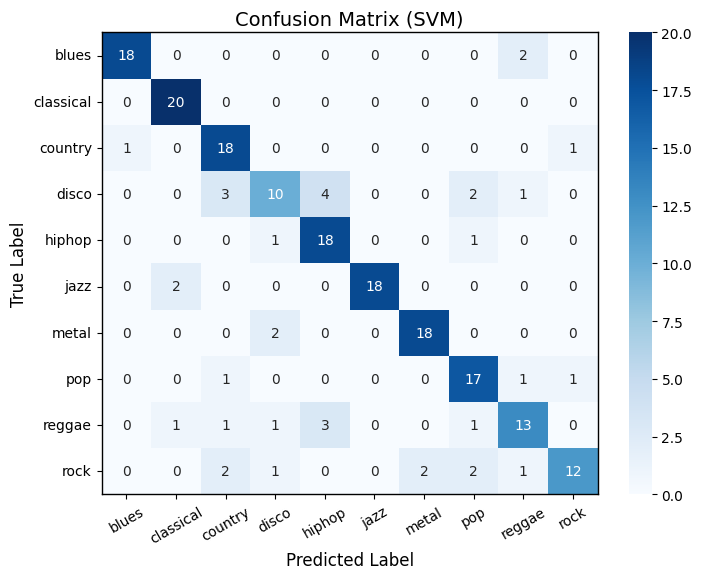

In [129]:
model_svc = post_training(rs_svm, model_name)

### 2. Random Forest

In [133]:
model_name = 'Random Forest'
model = RandomForestClassifier()
param_distributions = [
    {
        'n_estimators' : np.arange(300, 600).tolist(),
        'criterion'    : ['gini', 'entropy', 'log_loss'],
        'max_depth'    : [ 5, 8, 10, 15],
        'max_features' : ['sqrt', 'log2', None]
    },
    {
        'n_estimators' : np.arange(300, 600).tolist(),
        'criterion'    : ['gini', 'entropy', 'log_loss'],
        'max_depth'    : [None],
        'max_features' : ['sqrt', 'log2', None]
    }   
]
rs_rf = RandomizedSearchCV(model, param_distributions,
                            scoring='accuracy', cv=5, verbose=2,
                            n_jobs = -1, random_state=42,
                            n_iter = 200, refit = True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy',
                                                       'log_loss'],
                                         'max_depth': [5, 8, 10, 15],
                                         'max_features': ['sqrt', 'log2', None],
                                         'n_estimators': [300, 301, 302, 303,
                                                          304, 305, 306, 307,
                                                          308, 309, 310, 311,
                                                          312, 313, 314, 315,
                                                          316, 317, 318, 319,
                                                          320, 321, 322, 323,
                                                          324, 325, 326, 327,
                                                          328, 329, ...]},
                                        {'criterion': ['gini', 'entropy',
                                                       'log_loss'],
                                         'max_depth': [None],
                                         'max_features': ['sqrt', 'log2', None],
                                         'n_estimators': [300, 301, 302, 303,
                                                          304, 305, 306, 307,
                                                          308, 309, 310, 311,
                                                          312, 313, 314, 315,
                                                          316, 317, 318, 319,
                                                          320, 321, 322, 323,
                                                          324, 325, 326, 327,
                                                          328, 329, ...]}],
                   random_state=42, scoring='accuracy', verbose=2)

Best Accuracy = 0.7000
Best Parameters = 
{'n_estimators': 370, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'log_loss'}
Test Accuracy = 75.50 %


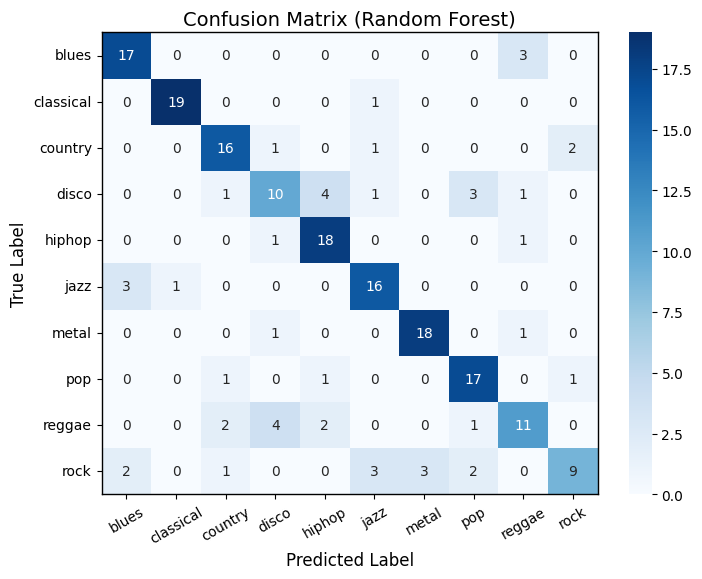

In [134]:
model_rf = post_training(rs_rf, model_name)

### 3. K Nearest Neighbors

In [136]:
model_name = 'KNN'
model = KNeighborsClassifier()
param_distributions = [
    {
        'n_neighbors' : np.arange(1, 20).tolist(),
        'weights'     : ['uniform', 'distance'],
        'algorithm'   : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size'   : [10, 15, 20, 25, 30, 35, 40]
    }   
]
rs_knn = RandomizedSearchCV(model, param_distributions,
                            scoring='accuracy', cv=5, verbose=2,
                            n_jobs = -1, random_state=42,
                            n_iter = 2, refit = True)
rs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=2, n_jobs=-1,
                   param_distributions=[{'algorithm': ['auto', 'ball_tree',
                                                       'kd_tree', 'brute'],
                                         'leaf_size': [10, 15, 20, 25, 30, 35,
                                                       40],
                                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19],
                                         'weights': ['uniform', 'distance']}],
                   random_state=42, scoring='accuracy', verbose=2)

Best Accuracy = 0.7012
Best Parameters = 
{'weights': 'uniform', 'n_neighbors': 10, 'leaf_size': 40, 'algorithm': 'brute'}
Test Accuracy = 74.00 %


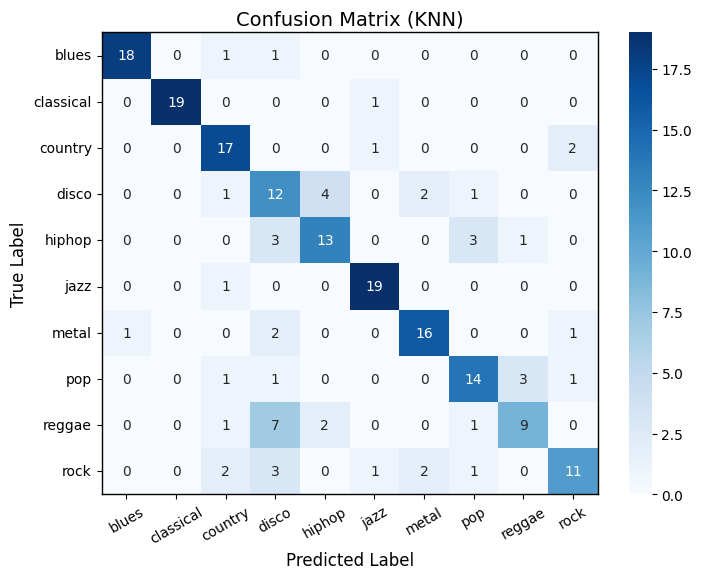

In [137]:
model_knn = post_training(rs_knn, model_name)

### 4. XGBoost

In [ ]:
model_name = 'XG Boost'
model = XGBClassifier()
param_distributions = [
    {
        'n_estimators' : np.arange(50, 200).tolist(),
        'max_depth'    : [5, 10, 15, 20, 25, 30],
        'subsample'    : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree' : [0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel' : [0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight':  scipy.stats.uniform(0.5, 10.0),
        'gamma': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
        'reg_lambda': scipy.stats.loguniform(0.1, 100.0),
        'learning_rate': scipy.stats.loguniform(0.0001, 10.0)
    } 
]
rs_xgb = RandomizedSearchCV(model, param_distributions,
                            scoring='accuracy', verbose=2, cv=5,
                            n_jobs = -1, random_state=42, n_iter = 200,
                            refit = True)
rs_xgb.fit(X_train, y_train)

In [ ]:
model_xgb = post_training(rs_xgb, model_name)

### Test Accuracy for all models